Part 1 

Rappel de fonctionnement de l'aglo KMeans

In [6]:
%matplotlib inline

In [16]:
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)


#### Présentation de la base de données:

Le fichier **DATA1.txt** contient un ensemble 132 données en dimension 2. Ce jeu de donnée jouet a été simulé à partir de trois gaussiennes. Le nombre de classes est donc connu. Dans les faits, pour chacune des données on pourra donc avoir une idée de sa classe d'appartenance. Pour résoudre le problème d'aggrégation, on pourrait déterminer les classes à la main.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn_extra.cluster import KMedoids
from scipy.spatial import distance

In [7]:
Data1=pd.read_csv('DATA1.txt',sep='\s+', header=None,
                  names=['Dim1','Dim2'],
                  dtype={'Dim1': np.float64, 'Dim2': np.float64})

On peut visualiser les données dans un plan 2D

Text(0.5, 1.0, 'Données issues de trois gaussiennes')

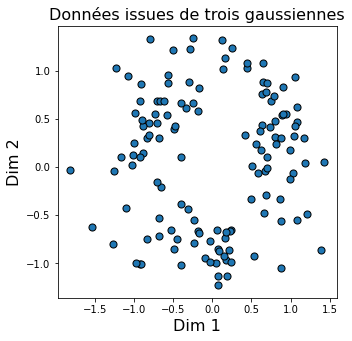

In [12]:
# affichage des points ayant servis pour adapter le modèle.
plt.figure(figsize=(5,5))
plt.scatter(Data1['Dim1'].values,Data1['Dim2'].values, edgecolor='k', s=50)
plt.xlabel('Dim 1',fontsize=16)
plt.ylabel('Dim 2',fontsize=16)
plt.title("Données issues de trois gaussiennes",
          fontsize=16)

On va essayer d'étudier l'impact du nombre de classes sur les performance de l'algorithme. Pour ce fait, nous allons calculer pour chaque valeur k (nombre de clusters), l'inertie intraclasse, le coefficient BIC et le score moyen de Silhouette. (ToDo)


In [25]:
# liste_n_clusters donne le nbre de clusters considérés dans chaque expérience
X = Data1[['Dim1','Dim2']].values
liste_n_clusters=[1, 2, 3, 4, 5, 8, 10, 15, 20,  len(Data)//2, len(Data)]
liste_n_clusters

[1, 2, 3, 4, 5, 8, 10, 15, 20, 66, 132]

Les méthodes pour choisir le nombre de clusters :
- L'inertie intra-classes
- Le score BIC
- Le coefficient moyen de Silhouette

In [26]:
# les paramétres
inerties_intra = list()
bic_clusters = list()
silhouette_avg = list()
silhouette_sample_values = list()

for i,n_clusters in enumerate(liste_n_clusters):
    
    # création du modèle de classification
    k_means=KMeans(n_clusters=n_clusters)
    k_means.fit(X)

    # calcul de l'inertie intra classes
    if n_clusters==1:
        inertie_totale= k_means.inertia_
    inertie_intra_=100 * k_means.inertia_ / inertie_totale
    inerties_intra.append(k_means.inertia_)

    # Calcul du BIC de la partition
    if n_clusters!=1 and n_clusters!=Data.shape[0]:
        bic_clusters.append(compute_bic(k_means,Data))

    # Calcul du coefficient de silhouette 
    #  (silhouette_score gives the average value for all the samples)
    if n_clusters!=1 and n_clusters!=Data.shape[0]:
        silhouette_avg.append(silhouette_score(X, k_means.labels_))
        silhouette_sample_values.append(silhouette_samples(X, k_means.labels_))

#### Analyse de la variance (inertie intra)
nous présentons l'inertie intra-classe pour k de 2 jusqu'à 132 (le taille de dataset). Nous pouvons voir un coude d'inertie pour k = 3 ce qui montre de 

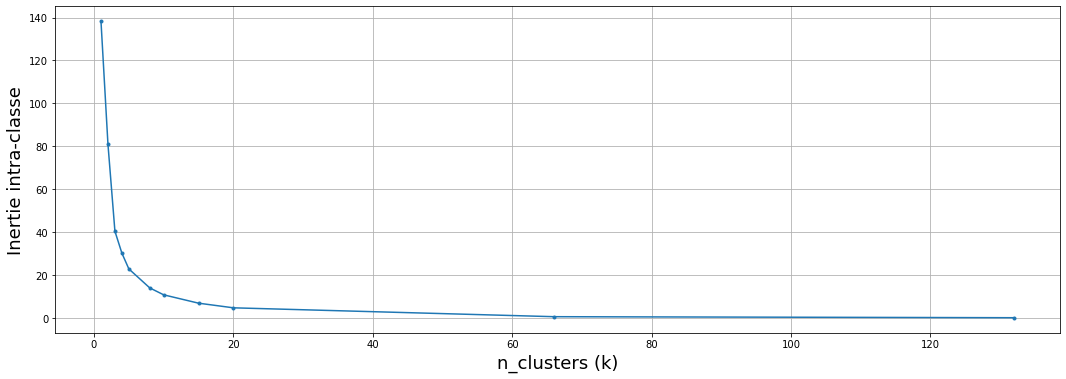

In [18]:
plt.figure(figsize=(18,6))
plt.plot(liste_n_clusters[::-1],inerties_intra[::-1],'.-')
plt.grid()
plt.xlabel('n_clusters (k)',fontsize=18)
plt.ylabel('Inertie intra-classe',fontsize=18) ;

#### BIC pour différents nombres de centres

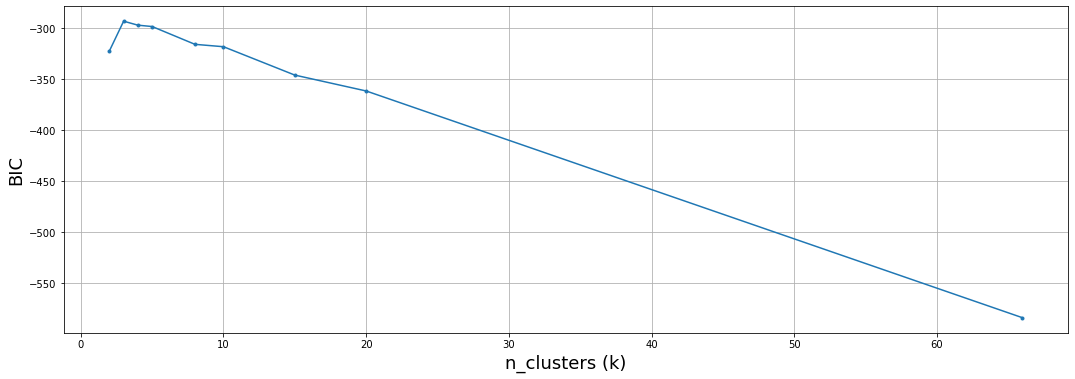

In [19]:
plt.figure(figsize=(18,6))
plt.plot(liste_n_clusters[-2:0:-1],bic_clusters[::-1],'.-')
plt.grid()
plt.xlabel('n_clusters (k)',fontsize=18)
plt.ylabel('BIC',fontsize=18) ;

**Coef de silhouette**

Text(0, 0.5, 'coefficient de silhouette')

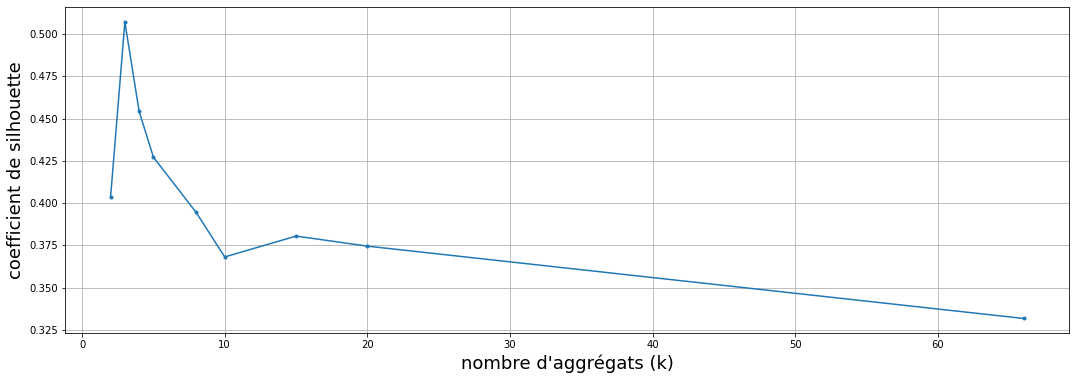

In [60]:
plt.figure(figsize=(18,6))
plt.plot(liste_n_clusters[-2:0:-1],silhouette_avg[::-1],'.-')
plt.grid()
plt.xlabel('''nombre d'aggrégats (k)''',fontsize=18)
plt.ylabel('coefficient de silhouette',fontsize=18)

In [44]:
# Paramètres
n_classes = 3
clf = KMeans(n_clusters=n_classes).fit(Data)

In [58]:
# printing cluster centres coord
clf.cluster_centers_

array([[-0.238845  , -0.7946375 ],
       [-0.66951136,  0.59107045],
       [ 0.81275417,  0.29454583]])

Il existe une autre méthode **adjusted_rand_score** défini dans la bibliothèque Sklearn. Cette méthode permet de mesurer la similarité entre deux clusters (prédit et target) donc pour utiliser cette métrique il faut avoir les labels de la base de données.

[pour plus de détails, Tape here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

Frontières de Décision

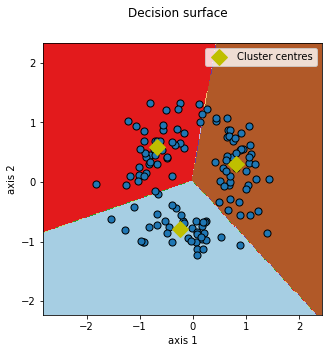

In [56]:
## Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

# prediction label
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plotting 
plt.figure(figsize=(5, 5))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel("axis 1")
plt.ylabel("axis 2")

plt.scatter(X[:, 0],X[:, 1], edgecolor='k', s=50)
plt.plot(clf.cluster_centers_[:, 0],clf.cluster_centers_[:,1], 'yD',
         markersize=12, label = "Cluster centres")

plt.axis("tight")
plt.suptitle("Decision surface")
plt.legend()
plt.show()